# **What we will cover in this notebook**

1. Getting a custom dataset with PyTorch
2. Preparing and visualising data
3. Transforming data to use with model
4. Loading custom dataset
5. Building a model to classify images
6. Comparing models with and without data augmentation
7. Making predictions with custom datasets

# **1. Getting custom dataset with PyTorch**

* Getting your own data to perform model operations on
* Depending upon the nature of your data you will have to look into the domain library

**Importing PyTorch and setting up device agnostic code**

In [1]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available else 'cpu'

device_name = torch.cuda.get_device_name(device)

**Getting food images**

* torchvision datasets: https://pytorch.org/vision/master/datasets.html
* We will be using a subset of Food 101 dataset
* Our subset will have 3 classes `steak`, `pizza` & `sushi`
* The orignal dataset has 101 classes with 750 training images and 250 testing images for each class
* Our dataset will use 10% of the data (75 for training and 25 for the testing)
* The goal is to *start and practice small before going big*

In [2]:
import requests
import zipfile
from pathlib import Path

# Set up path
data_path = Path(r'D:\software\Deep learning\data')
image_path = data_path/'pizza_steak_sushi'

# if image path does not exist, create one
if image_path.is_dir():
    print(f'{image_path} exists skipping download')
else:
    print(f'{image_path} does not exist, creating one')
    image_path.mkdir(parents=True, exist_ok= True)

# Download image data
with open(image_path/'pizza_steak_sushi.zip', 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip')
    print('Downloading data...')
    f.write(request.content)
    print('Done !')

D:\software\Deep learning\data\pizza_steak_sushi exists skipping download
Done !


**Unzipping the data**

In [3]:
with zipfile.ZipFile(image_path/'pizza_steak_sushi.zip', 'r') as zip_ref:
    print('Unzipping the file...')
    zip_ref.extractall(image_path)
    print('Done !')

Unzipping the file...
Done !


# **2. Preparing and visualising data**

* Creating a directory path walkthrough function

In [4]:
import os

def walkthrough(dir_path):

    for dirpath, dirnames, filenames in os.walk(dir_path):

        print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}\n')

walkthrough(image_path)

There are 2 directories and 1 images in D:\software\Deep learning\data\pizza_steak_sushi

There are 3 directories and 0 images in D:\software\Deep learning\data\pizza_steak_sushi\test

There are 0 directories and 25 images in D:\software\Deep learning\data\pizza_steak_sushi\test\pizza

There are 0 directories and 19 images in D:\software\Deep learning\data\pizza_steak_sushi\test\steak

There are 0 directories and 31 images in D:\software\Deep learning\data\pizza_steak_sushi\test\sushi

There are 3 directories and 0 images in D:\software\Deep learning\data\pizza_steak_sushi\train

There are 0 directories and 78 images in D:\software\Deep learning\data\pizza_steak_sushi\train\pizza

There are 0 directories and 75 images in D:\software\Deep learning\data\pizza_steak_sushi\train\steak

There are 0 directories and 72 images in D:\software\Deep learning\data\pizza_steak_sushi\train\sushi



**Setting up train and testing path**

In [5]:
train_dir = image_path/'train'
test_dir = image_path/'test'

train_dir, test_dir

(WindowsPath('D:/software/Deep learning/data/pizza_steak_sushi/train'),
 WindowsPath('D:/software/Deep learning/data/pizza_steak_sushi/test'))

# **Visualising image**

1. Get all the paths of the images
2. Pick a random image using python's `random.choice`
3. Get the image class name using Python's `pathlib.Path.parent.stem`
4. Since we are working with images, we will use python's PIL
5. We will then show the image and print the metadata

Image path: D:\software\Deep learning\data\pizza_steak_sushi\train\pizza\2190018.jpg
image class: pizza
Image height: 512
Image width: 512


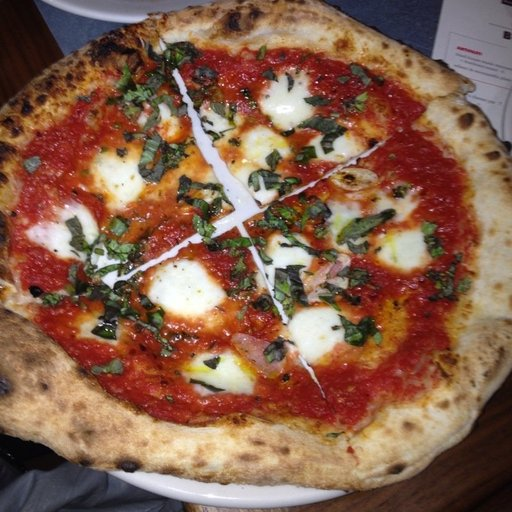

In [6]:
import random
from PIL import Image

# Setting up random seed
# random.seed(42)

# 1. Getting all the paths of the images
image_path_list = list(image_path.glob('*/*/*.jpg'))

# 2. Picking up a random image path
random_image_path = random.choice(image_path_list)

# 3. Get the image class name
class_name = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Printing metadata
print(f"Image path: {random_image_path}\nimage class: {class_name}\nImage height: {img.height}\nImage width: {img.width}")

img

**Plotting image using matplotlib**

* To open an image in matplotlib first the image array is needed
* Image array can be obtained using `plt.imread()`
* After the image data is captured plot it using `plt.imshow()`

In [7]:
import matplotlib.pyplot as plt

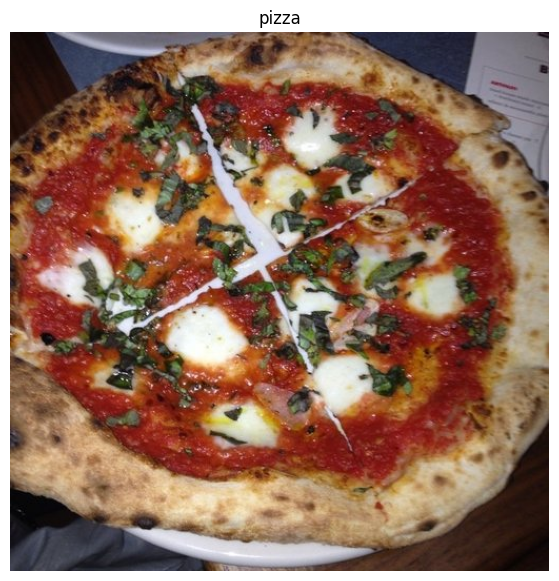

In [8]:
image = plt.imread(random_image_path)

plt.figure(figsize=(10,7))
plt.imshow(image)
plt.title(f'{class_name}')
plt.axis(False);

**Using numpy**

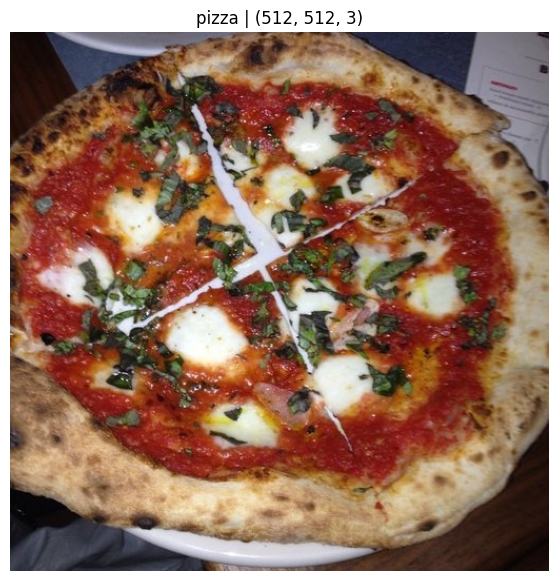

In [9]:
import numpy as np

image_as_array = np.asarray(image) # Turn image into array
plt.figure(figsize=(10,7))
plt.imshow(image_as_array)
plt.title(f'{class_name} | {image.shape}')
plt.axis(False);

# **Turning all the images into tensors**

* Before using image data in pyhton we will have to:
  1. Turn the target data into tensors
  2. Turn the data into `torch.utils.data.Dataset` & subsequently into `torch.utils.data.DataLoader`. We will use the data using them

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

**Transforming data** using `torchvision.transforms`

* The transform function will take a PIL image

In [11]:
data_transform = transforms.Compose([
    # Resizing the images
    transforms.Resize(size=(64,64)),

    # Flip the images horizontally
    transforms.RandomHorizontalFlip(p=0.5),

    # Turn the image into tensor
    transforms.ToTensor()
])

**More visualisation**

* We will transform and plot the original and transformed images to compare them

In [12]:
# Creating a list of train and test images path

train_dir_images = list(train_dir.glob('*/*.jpg'))
test_dir_images = list(test_dir.glob('*/*.jpg'))

**Important Note:**


* The above error is due to the image shape mismatch
* The dataset image format is `CxHxW (color_channel x Height x Width)` but to plot image is matplotlib the image format should be `HxWxC (Height x Width x color_channel)`
* To change the image shape alignment we will use `permute()` method
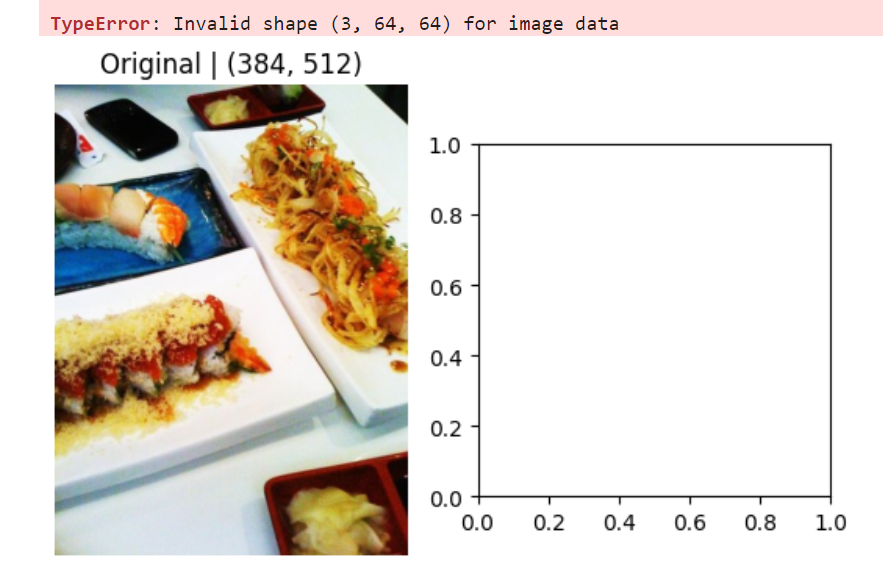

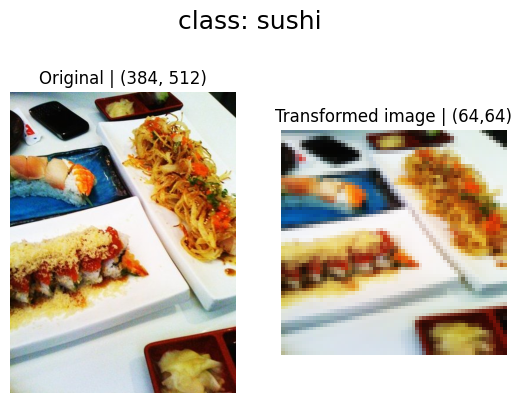

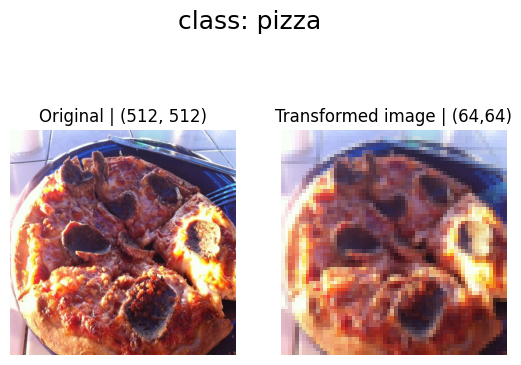

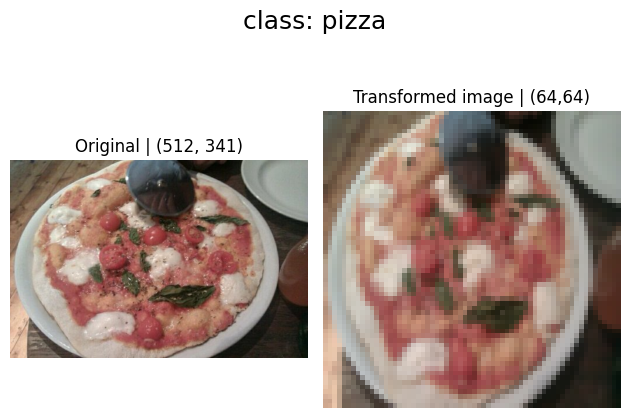

In [13]:
import random

def plot_transformed_images(images_path: list, transform, n=3, seed=None):

    # Selects a random image transform it and plot it against the original image
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(images_path, k=n)
    
    for image_path in random_image_paths:
        with Image.open(image_path) as f:

            fig, ax = plt.subplots(nrows=1, ncols=2)
            
            ax[0].imshow(f)
            ax[0].set_title(f'Original | {f.size}')
            ax[0].axis(False);

            # Transforming the image
            transformed_image = transform(f).permute(1,2,0) # changing from CxHxW to HxWxC 
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed image | ({transformed_image.shape[0]},{transformed_image.shape[1]})')
            ax[1].axis(False);

            fig.suptitle(f'class: {image_path.parent.stem}', fontsize=18)
        
    plt.tight_layout()

plot_transformed_images(train_dir_images, transform=data_transform, n=3, seed=42)

* Changing the size of the image does make the image lose information. Therefore, the image size should be considered while keeping the performance of the model in mind
* We are replicating CNN explainer neural network

# **4. Option 1: Loading images using** `ImageFolder()`

* We will use `ImageFolder()` to load custom dataset- https://pytorch.org/vision/main/datasets.html#base-classes-for-custom-datasets

In [14]:
from torchvision import datasets

In [15]:
train_data = datasets.ImageFolder(root= train_dir,
                                 transform=data_transform, # transform for the data
                                 target_transform=None) # transform for the targets

test_data = datasets.ImageFolder(root= test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: D:\software\Deep learning\data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: D:\software\Deep learning\data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

**Get classes name**

In [16]:
classes_name = train_data.classes

# Getting classes name as dict
classes_name_dict = train_data.class_to_idx

**Visualising the dataset sample**

In [17]:
image, label = train_data[0][0], train_data[0][1]

print(f'Image shape: {image.shape}\nImage dtype: {image.dtype}\nLabel: {label}\nClass name: {classes_name[label]}')

Image shape: torch.Size([3, 64, 64])
Image dtype: torch.float32
Label: 0
Class name: pizza


In [18]:
# Rearranging image shape for matplotlib

image_permute = image.permute(1,2,0)
print(f'Image shape: {image_permute.shape}\nImage dtype: {image_permute.dtype}\nLabel: {label}\nClass name: {classes_name[label]}')

Image shape: torch.Size([64, 64, 3])
Image dtype: torch.float32
Label: 0
Class name: pizza


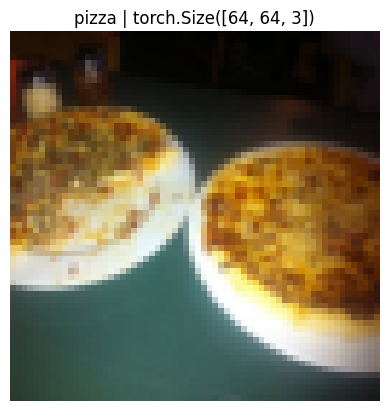

In [19]:
plt.imshow(image_permute)
plt.title(f'{classes_name[label]} | {image_permute.shape}')
plt.axis(False);

**Creating dataloader**

* `DataLoader` will turn our custom dataset into an iterable which will iterate through the dataset using `batch_size`

**Turn train and test dataset into a DataLoader**

In [20]:
from torch.utils.data import DataLoader

batch_size = 32
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=batch_size,
                             shuffle=True,
                             num_workers=2)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=batch_size,
                             shuffle=True,
                             num_workers=2)

**Getting image shape from the DataLoader**

In [21]:
img, label = next(iter(train_dataloader))

print(f'Image shape from the dataloader: {img.shape} --> [batch_size, color_channel, height, width]\nLabel shape: {label.shape}')


Image shape from the dataloader: torch.Size([32, 3, 64, 64]) --> [batch_size, color_channel, height, width]
Label shape: torch.Size([32])


# **Option 2: Loading data with custom datasets**

* Loading images from file
* Getting class names from dataset
* Getting claas names as directory from the dataset

*Pros:*
* Can create dataset out of any data
* not bound to Pytorch's in-built functions

*Cons:*
* Eventhough dataset can be made out of any data, it does not mean it'd automatically work
* Creating and using custom made functions makes the code more prone to errors and performance issues

In [22]:
import os
import pathlib
import torch

from torch.utils.data import Dataset
from torchvision import transforms
from typing import Dict, List, Tuple

* Writing a helper function which takes file path to return class names in a list and a dictionry labeling the classes
* The objective is to replicate `ImageFolder()`

**Creating a helper function to get class names:**
* Get the class names using `os.scandir()` to traverse a target directory
* Raise an error if classes names are not found

In [23]:
# Setting up a target directory

target_dir = train_dir

print(f"Target directory: {train_dir}")

Target directory: D:\software\Deep learning\data\pizza_steak_sushi\train


In [24]:
class_names = sorted([entry.name for entry in list(os.scandir(target_dir))])

class_names

['pizza', 'steak', 'sushi']

In [25]:
def find_classes(dir) -> Tuple:
    # Getting classes
    class_names = sorted([entry.name for entry in list(os.scandir(target_dir)) if entry.is_dir()])

    if not class_names:
        raise FileNotFoundError (f"No classes were found in {dir}")
    # Creating classes dictionary
    class_idx = {class_name:i for i, class_name in enumerate(class_names)}

    return class_names, class_idx

In [26]:
classes_name , classes_idx = find_classes(target_dir)

print(classes_name , classes_idx)

['pizza', 'steak', 'sushi'] {'pizza': 0, 'steak': 1, 'sushi': 2}


# **Create a custom dataset to replicate** `ImageFolder()`

1. Subclass `torch.utils.data.dataset`
2. Init our subclass with target directory as well as a transform (if we want to transform our data)
3. Create several attributes:
   * Paths
   * Transform
   * classes - a list of target classes
   * class_to_idx - a dict of classes mapped to an index
4. Create a function to load images
5. Overwrite the `__len__()`method to return the length of the dataset
6. Overwrite the `__getitem__()` method to return a sample when passed an index

In [27]:
import torch

# 0. Write a custom dataset
from torch.utils.data import Dataset

# 1. Subclassing torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # 2. Initialise paths and transforms
    def __init__(self, target_dir: str, transform=None):
        super().__init__()

    # 3. Creating attributes
        
        # Getting path for target images
        self.paths = list(target_dir.glob('*/*.jpg'))

        # Getting transform
        self.transform = transform
        
        # Getting class names and the class_to_idx
        self.classes, self.classes_to_idx = find_classes(target_dir)

    # 4. Creating a function to load images
    def load_images(self, index: int):
        image = self.paths[index]

        return Image.open(image)

    # 5. Overwrite __len__() to get the length of the dataset
    def __len__(self) -> int:
        return len(self.paths)

    # 6. Overwrite __getitem__() 
        # Objective is to replicate the following:
            # img, label = train_data[0]
            # img, label

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        image = self.load_images(index)
        class_name = self.paths[index].parent.stem
        class_idx = self.classes_to_idx[class_name]

        if self.transform:
            return self.transform(image), class_idx
        else: 
            return image, class_idx

**Create a transform**

In [28]:
from torchvision import transforms

train_transforms = transforms.Compose([transforms.Resize(size = (64, 64)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(size = (64, 64)),
                                      transforms.ToTensor()])


**Testing** `ImageFolderCustom()` 

In [29]:
train_data_custom = ImageFolderCustom(target_dir=train_dir, transform=train_transforms)
test_data_custom = ImageFolderCustom(target_dir=test_dir, transform=test_transforms)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x22e40bbe450>,
 <__main__.ImageFolderCustom at 0x22e40c1cfb0>)

In [30]:
len(train_data), len(train_data_custom)

(225, 225)

In [31]:
len(test_data), len(test_data_custom)

(75, 75)

In [32]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [33]:
train_data_custom.classes_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [34]:
# Check for equality between original ImageFolder and ImageFolderCustom

print(train_data.classes==train_data_custom.classes)

True


**A function to display random images**

1. Take in a dataset and a number of parameters such as `class_names` and number of samples to plot
2. To prevent the plot taking too much space, limit the max value to 10
3. Set the Random seed
4. Setup matplotlib plot
5. Loop through random samples & plot them with matplotlib
6. Make sure the dimensions of our images to line up `(H,M,C)`

In [35]:
import matplotlib.pyplot as plt
import random

In [36]:
def display_images(dataset: torch.utils.data.dataset, num_of_plot: int = 10, seed=None):
    
    # Getting random index to plot images rather than picking images randomly
    random_samples_idx = random.sample(range(len(dataset)), k=num_of_plot)

    # Setting up the seed
    if seed:
        random.seed(seed)
        
    # Setting up max plot
    if num_of_plot<=10:
        fig, ax = plt.subplots(ncols=num_of_plot, nrows=1, figsize=(15,15))

        # Setting up matplotlib plot
        for i, image_index in enumerate(random_samples_idx):
            img, label = train_data_custom[image_index]
            img = img.permute(1,2,0)
            ax[i].imshow(img)
            ax[i].set_title(f'{dataset.classes[label]}')
            ax[i].axis(False)
    else:
        print("The max allowed plot is 10")

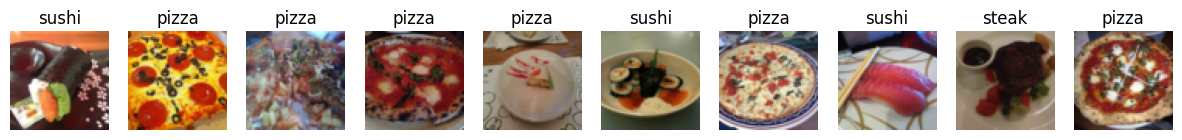

In [37]:
display_images(dataset=train_data_custom, num_of_plot=10, seed=101)

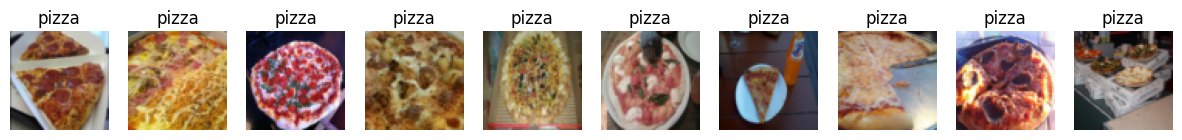

In [38]:
display_images(dataset=test_data_custom, num_of_plot=10, seed=101)

# Creating DataLoader

In [39]:
from torch.utils.data import DataLoader
import os

batch_size = 32
num_workers = 2

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=batch_size,
                                     shuffle=True)

train_dataloader_custom

In [40]:
img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

# **Data augmentation**

* Increase the variety in data artificially by manupulating the data digitally
* Data augmentation: https://www.datacamp.com/tutorial/complete-guide-data-augmentation
* Read more: https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/

# **Trivial augment**

* It is a type of transform
* Read more: https://medium.com/geekculture/trivialaugment-the-next-evolution-in-data-augmentation-a218339a2687

In [41]:
# Creating transforms 

from torchvision import transforms

In [42]:
train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=30),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

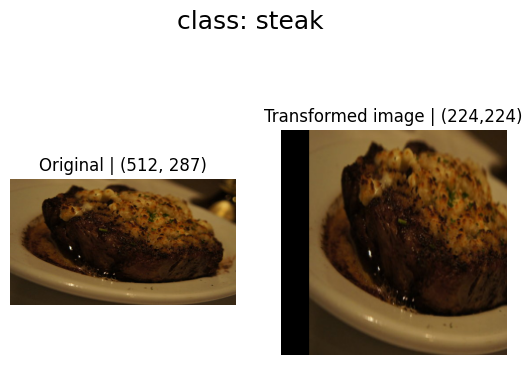

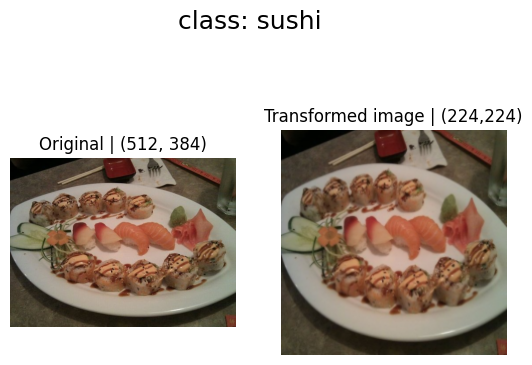

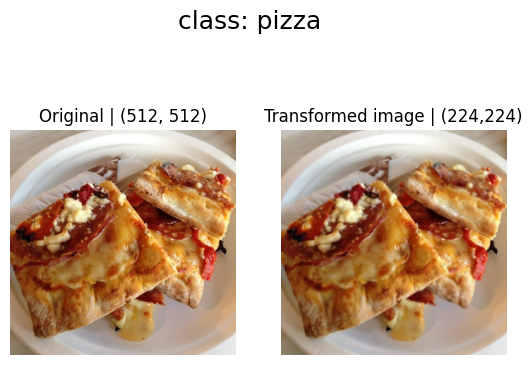

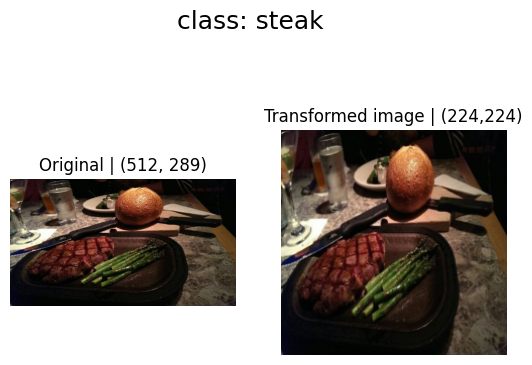

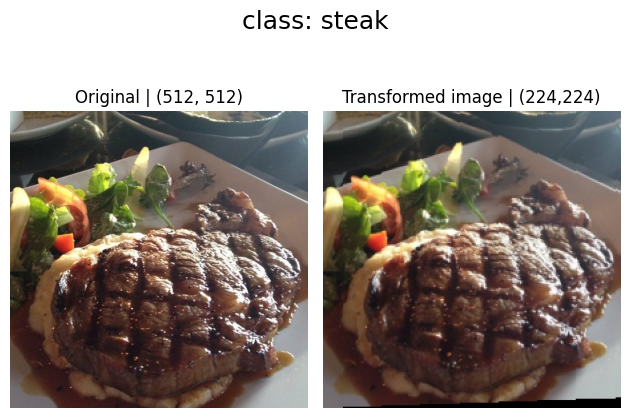

In [43]:
plot_transformed_images(list(train_data_custom.paths), transform=train_transform, n=5)

# Building baseline model
* **Model 0: Tiny VGG without data augmentation**

1. Create transform and load data

In [44]:
from torchvision import datasets
from torchvision import transforms

# Create transform
simple_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.ToTensor()])

# Load and transform data
train_data_simple = datasets.ImageFolder(root=train_dir,
                                        transform= simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform= simple_transform)

train_data_simple, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: D:\software\Deep learning\data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: D:\software\Deep learning\data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

2. Create dataloader

In [45]:
from torch.utils.data import DataLoader

batch_size = 32

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                    batch_size=batch_size)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=batch_size)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x22e416b94c0>,
 <torch.utils.data.dataloader.DataLoader at 0x22e40a74a10>)

In [46]:
next(iter(train_dataloader_simple))[0].shape

torch.Size([32, 3, 64, 64])

# **Replicating VGG architecture**

* CNN explainer: https://poloclub.github.io/cnn-explainer/

In [91]:
# Creating model 
import torch
from torch import nn

class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()

        # Convolution block 1
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)
        )
        
        # Convolution block 2
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13,
                     out_features=output_shape)
        )
    
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)

        x = self.conv_block_2(x)
        # print(x.shape)

        x = self.classifier(x)
        # print(x.shape)

        return x

In [92]:
model_0 = TinyVGG(input_shape=3, # number of color channels
                hidden_units=10,
                output_shape= len(classes_name)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

**Testing the model with a single batch**

* Getting a single image and label batch

In [93]:
batch_images, batch_labels = next(iter(train_dataloader_simple))

batch_images.shape, batch_labels.dtype

(torch.Size([32, 3, 64, 64]), torch.int64)

In [94]:
y_pred_1 = model_0(batch_images.to(device))

y_pred_1, _ = torch.softmax(y_pred_1, dim=1).max(dim=1)
y_pred_1.dtype

torch.float32

# **Using torchinfo**

In [95]:
from torchinfo import summary

summary(model_0, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

# **Creating train and testing loops**

* Getting loss function and optimiser

In [96]:
# loss function
loss_fn_0 = nn.CrossEntropyLoss()

# Optimiser function
optimiser_0 = torch.optim.Adam(params=model_0.parameters(), lr=0.1)

* Accuracy function

In [97]:
import torch

def accuracy_fn(y_pred, y_true):
    
    # Get the predicted class by finding the index of the maximum logit/probability
    y_pred_classes = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)

    # Count the number of correct predictions
    correct = (y_pred_classes == y_true).sum().item()

    # Calculate accuracy
    accuracy = correct / y_true.size(0) * 100
    return accuracy


* Training and loop

In [98]:
def train_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimiser: torch.optim.Optimizer,
    accuracy = accuracy_fn,
    device: torch.device = device): # Setting up essential paramerters for the function

    # Setting up initial loss and accuracy values
    train_loss, train_acc = 0,0
    train_acc = float(train_acc)

    # Putting model on GPU
    model = model.to(device)

    # Putting the model into training mode
    model.train()

    # Setting up the data iteration loop
    for batch, (X_train, y_train) in enumerate(dataloader):
        X_train, y_train = X_train.to(device), y_train.to(device)

        # forward pass
        y_logit = model(X_train)

        # Getting train loss
        training_loss = loss_fn_0(y_logit, y_train)
        train_loss += training_loss
        
        # Testing with accuracy
        train_acc += accuracy_fn(y_logit, y_train)

        # Optimiser zero grad
        optimiser.zero_grad()

        # Backpropagation
        training_loss.backward()

        # Optimiser step
        optimiser.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    return train_loss, train_acc 
    # print(f'Train loss: {train_loss:.5f} | train accuracy : {train_acc:.2f}%')

def test_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy = accuracy_fn,
    device: torch.device = device): # Setting up essential paramerters for the function

    # Setting up initial loss and accuracy values
    test_loss, test_acc = 0,0
    
    model = model.to(device)

    model.eval()
    with torch.inference_mode():

        for (X_test, y_test) in dataloader:
            
            X_test, y_test = X_test.to(device), y_test.to(device)

            y_pred = model(X_test)
            
            testing_loss = loss_fn(y_pred, y_test)
            test_loss += testing_loss

            test_acc += accuracy_fn(y_pred, y_test)

        test_acc /= len(dataloader)
        test_loss /= len(dataloader)

    return test_loss, test_acc
#    print(f'Test loss: {test_loss:.5f} | Testing accuracy : {test_acc:.2f}%\n')


# **Creating a** `train_model()` **function**

* It will take the following parameters:
1. model
2. epoch values
3. loss function
4. optimiser
5. training data
6. device

Combining the `train_model()` and `eval_model()` afterwards

In [99]:
import torch
from torch import nn
from tqdm.auto import tqdm

# Creating the train function and implementing the test function as well
def train_model(model: nn.Module,
               train_dataloader: torch.utils.data.DataLoader,
               test_dataloader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               epochs: int,
               optimiser: torch.optim.Optimizer,
               device: torch.device=device):

    # Creating dictionary to store the results
    results = {
               'train_loss': [],
               'train_acc': [],
               'test_loss': [],
               'test_acc': []
              }

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc= train_step(dataloader=train_dataloader,
                                          model=model,
                                          optimiser=optimiser,
                                          loss_fn=loss_fn,
                                          device=device)

        test_loss, test_acc= test_step(dataloader=test_dataloader,
                                       model=model_0,
                                       loss_fn=loss_fn_0,
                                       device=device)

        print(f'Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc : {train_acc:.3f}% | Test loss: {test_loss:.3f} | Test acc : {test_acc:.3f}%')

        results['train_loss'].append(round(train_loss.item(), 2))
        results['train_acc'].append(round(train_acc, 2))
        results['test_loss'].append(round(test_loss.item(), 2))
        results['test_acc'].append(round(test_acc, 2))

    return results

In [100]:
from timeit import default_timer as timer

start_time = timer()

# train model and show the total time
model_0_results = train_model(model= model_0,
                          train_dataloader= train_dataloader_simple,
                          test_dataloader= test_dataloader_simple,
                          loss_fn= loss_fn_0,
                          optimiser= optimiser_0,
                          epochs= 20)

model_0_results
end_time = timer()

print(f'\nTotal training time: {end_time-start_time:.2f} seconds')

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 2597.833 | Train acc : 30.859% | Test loss: 10.834 | Test acc : 54.167%
Epoch: 1 | Train loss: 8.553 | Train acc : 2.734% | Test loss: 1.170 | Test acc : 19.792%
Epoch: 2 | Train loss: 1.148 | Train acc : 5.469% | Test loss: 1.170 | Test acc : 19.792%
Epoch: 3 | Train loss: 1.118 | Train acc : 5.469% | Test loss: 1.128 | Test acc : 19.792%
Epoch: 4 | Train loss: 1.096 | Train acc : 17.969% | Test loss: 1.085 | Test acc : 54.167%
Epoch: 5 | Train loss: 1.090 | Train acc : 40.234% | Test loss: 1.058 | Test acc : 54.167%
Epoch: 6 | Train loss: 1.094 | Train acc : 40.234% | Test loss: 1.044 | Test acc : 54.167%
Epoch: 7 | Train loss: 1.101 | Train acc : 40.234% | Test loss: 1.039 | Test acc : 54.167%
Epoch: 8 | Train loss: 1.106 | Train acc : 40.234% | Test loss: 1.038 | Test acc : 54.167%
Epoch: 9 | Train loss: 1.108 | Train acc : 40.234% | Test loss: 1.040 | Test acc : 54.167%
Epoch: 10 | Train loss: 1.108 | Train acc : 40.234% | Test loss: 1.043 | Test acc : 54.16

# **Creating function to plot the predictions**

* Getting random test samples and labels from the data
* Making predictions on those samples
* Plotting a comparison plot 

In [101]:
import random

def get_random_samples(data: torch.utils.data.Dataset):
    # Getting random test samples
    random_test_samples = []
    random_test_labels = []
    
    # Iterating over the data
    for sample, label in random.sample(list(data), k=9):
        random_test_samples.append(sample)
    
        class_name = class_names[label]
        random_test_labels.append(class_name)
    
    return random_test_samples, random_test_labels

In [102]:
def make_predictions(model: nn.Module, samples: list):
    test_predictions = []
    
    for i in range(len(samples)):
        y_test_pred = model_0(samples[i].unsqueeze(dim=0).to(device))
        y_test_pred = torch.softmax(y_test_pred, dim=1).argmax(dim=1)
    
        test_predictions.append(class_names[y_test_pred])

    return test_predictions

In [103]:
import matplotlib.pyplot as plt

def compare_predictions(n_rows: int, n_cols: int, data: list, true_labels: list, pred_labels: int):
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(9,9))

    axes = axes.flatten()

    for i, sample in enumerate(data):

        ax = axes[i]
        
        sample = sample.permute(1,2,0).numpy()
        ax.imshow(sample)

        true_label = true_labels[i]
        pred_label = pred_labels[i]

        title_text = f'Pred: {pred_label} | True: {true_label}'
        title_color = 'g' if pred_label == true_label else 'r'
        ax.set_title(title_text, color= title_color)

        ax.axis(False)

    plt.tight_layout()
    plt.show()

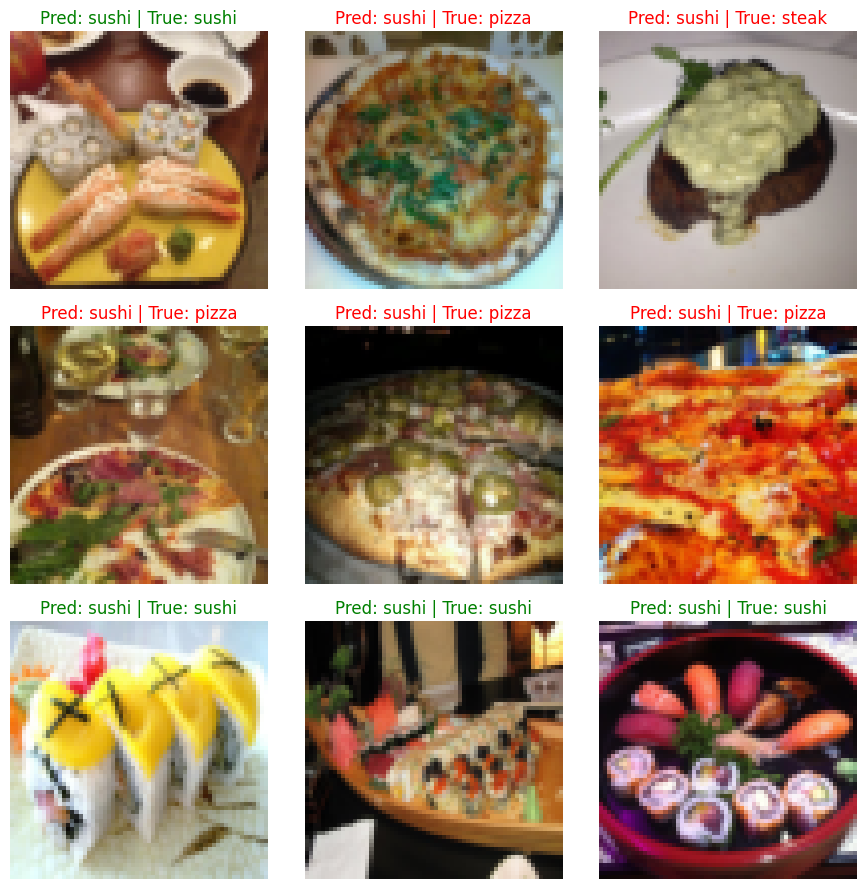

In [104]:
random_samples, random_labels = get_random_samples(data= test_data_simple)

pred_labels_model_0 = make_predictions(model= model_0, samples= random_samples)

compare_predictions(n_rows=3,n_cols=3, data=random_samples, true_labels=random_labels, pred_labels=pred_labels_model_0)

**Creating loss curves**

* Loss curves shows the loss in a model over time
* Read more: https://machinelearningmastery.com/plotting-the-training-and-validation-loss-curves-for-the-transformer-model/
* Creating loss curve function

In [105]:
def plot_loss_curves(results: Dict[str, List[float]], n_rows:int, n_cols:int):

    # Get the loss values from the dictionary
    train_loss = results['train_loss']
    test_loss = results['test_loss']
    
    # Get the accuracy values from the dictionary
    train_acc = results['train_acc']
    test_acc = results['test_acc']

    # Number of epochs
    epochs = range(len(results['train_loss']))

    plt.figure(figsize = (15,7))

    plt.subplot(n_rows, n_cols, 1)
    plt.plot(epochs, train_loss, label='train loss')
    plt.plot(epochs, test_loss, label='test loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(n_rows, n_cols, 2)
    plt.plot(epochs, train_acc, label='train accuracy')
    plt.plot(epochs, test_acc, label='test accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

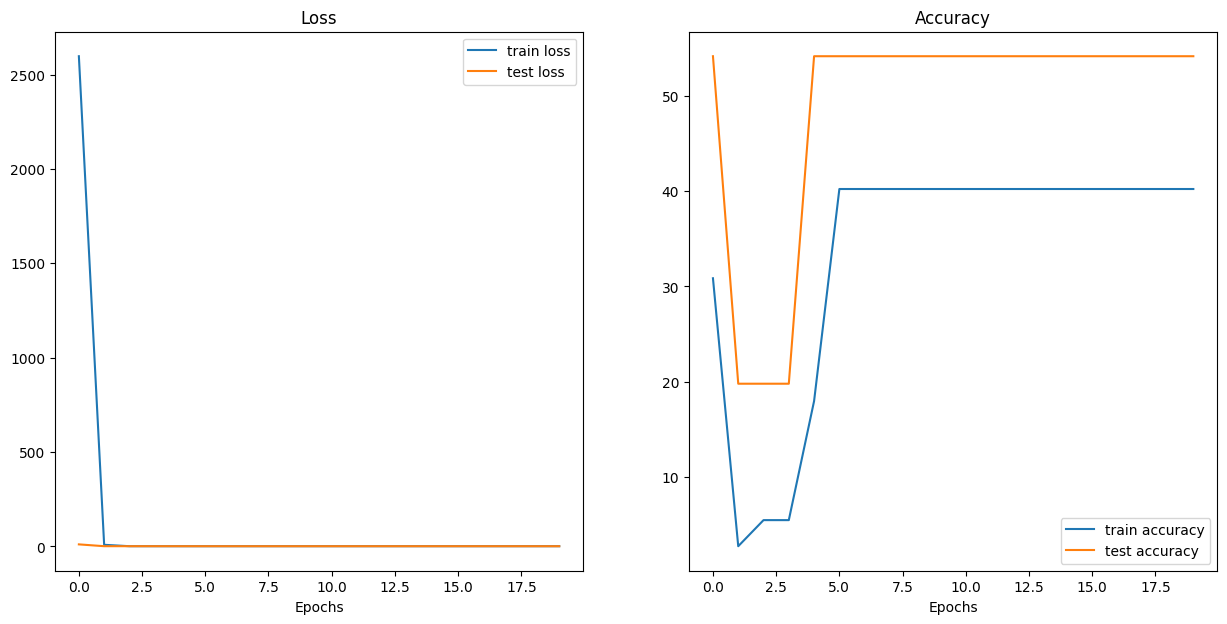

In [106]:
plot_loss_curves(model_0_results, n_rows=1, n_cols=2)

**Observation:**
* `model_0_results` gives bad results and testing the data using `compare_predictions()` & `plot_loss_curves()` shows the same
* The `moddel_0` is trained without data augmentation
* To improve the underfitting and overfitting look into learning rate scheduling: https://www.geeksforgeeks.org/understanding-pytorch-learning-rate-scheduling/
* Early stopping: https://cyborgcodes.medium.com/what-is-early-stopping-in-deep-learning-eeb1e710a3cf

# **Creating model_1 using data augmentation**

* `model_0` was underfitting, we will use the same `TinyVGG` model and train it using data augmentation

**Creating transform with data augmentation**

In [107]:
# Creating train transforms
from torchvision import transforms


train_transform_trivial = transforms.Compose([transforms.Resize(size=(64,64)),
                                             transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                             transforms.ToTensor()])

test_transform_trivial = transforms.Compose([transforms.Resize(size=(64,64)),
                                             transforms.ToTensor()])


# **Creating dataset using the transforms**

In [108]:
from torchvision import datasets

train_data = datasets.ImageFolder(root= train_dir, 
                                  transform= train_transform_trivial)

test_data = datasets.ImageFolder(root= test_dir, 
                                  transform= test_transform_trivial)


train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: D:\software\Deep learning\data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: D:\software\Deep learning\data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

# **Creating DataLoader**

In [109]:
from torch.utils.data import DataLoader

# Defining batch size
batch_size = 32

train_dataloader_2 = DataLoader(dataset= train_data,
                             batch_size=batch_size,
                             shuffle=True)

torch.manual_seed(42)
test_dataloader_2 = DataLoader(dataset= test_data,
                             batch_size=batch_size,
                             shuffle=True)

train_dataloader_2, test_dataloader_2

(<torch.utils.data.dataloader.DataLoader at 0x22e7b751310>,
 <torch.utils.data.dataloader.DataLoader at 0x22e410ae600>)

# **Construct and train model_1**

* Training using augmented data

In [110]:
torch.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_data.classes))

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

# **Creating loss function and optimiser**

In [111]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setting up number of epochs
num_epochs = 20

# Setting up optimiser and loss function
loss_fn_1 = nn.CrossEntropyLoss()
optimiser_1 = torch.optim.Adam(model_1.parameters(), lr = 0.001)

# Setting up timer
from timeit import default_timer as timer

start_time = timer()

# Train model
model_1_results = train_model(model= model_1, 
                              train_dataloader=train_dataloader_2,
                              test_dataloader=test_dataloader_2,
                              loss_fn= loss_fn_1,
                              optimiser= optimiser_1,
                              epochs= 20)

end_time = timer()

print(f'\nTotal training time: {end_time-start_time:.2f} seconds')

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.104 | Train acc : 25.000% | Test loss: 1.094 | Test acc : 38.258%
Epoch: 1 | Train loss: 1.079 | Train acc : 42.578% | Test loss: 1.082 | Test acc : 42.235%
Epoch: 2 | Train loss: 1.129 | Train acc : 30.469% | Test loss: 1.076 | Test acc : 44.223%
Epoch: 3 | Train loss: 1.107 | Train acc : 30.469% | Test loss: 1.113 | Test acc : 32.292%
Epoch: 4 | Train loss: 1.098 | Train acc : 30.859% | Test loss: 1.088 | Test acc : 40.246%
Epoch: 5 | Train loss: 1.088 | Train acc : 46.484% | Test loss: 1.082 | Test acc : 42.235%
Epoch: 6 | Train loss: 1.087 | Train acc : 51.172% | Test loss: 1.106 | Test acc : 34.280%
Epoch: 7 | Train loss: 1.087 | Train acc : 33.594% | Test loss: 1.094 | Test acc : 38.258%
Epoch: 8 | Train loss: 1.091 | Train acc : 43.359% | Test loss: 1.063 | Test acc : 48.201%
Epoch: 9 | Train loss: 1.069 | Train acc : 39.062% | Test loss: 1.094 | Test acc : 38.258%
Epoch: 10 | Train loss: 1.033 | Train acc : 46.875% | Test loss: 1.088 | Test acc : 40.246

**Plotting loss curves**

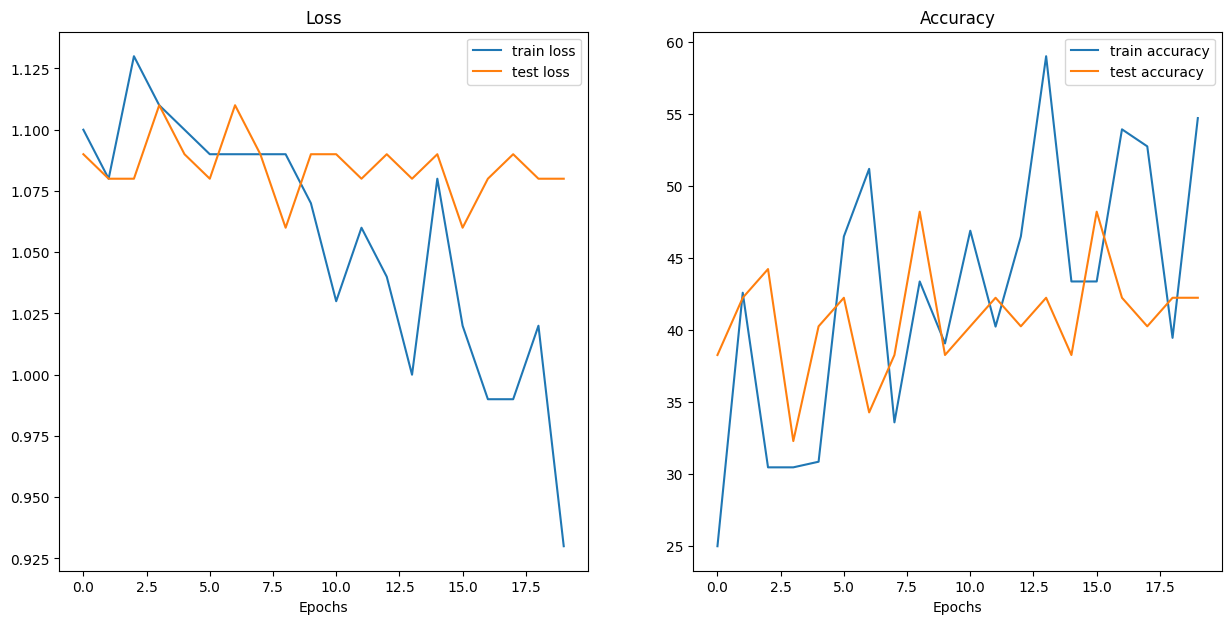

In [112]:
plot_loss_curves(model_1_results, n_rows=1, n_cols=2)

**Note:**
* Looking at the loss curve it looks like there is not much improvement using data augmentation
* Data augmentation is generally used for over-fitting models whereas the previous model was under-fitting 

**Compare model results**

* Hard coding
* PyTorch + Tensorboards: https://pytorch.org/docs/stable/tensorboard.html
* Weights and biases: https://wandb.ai/site/experiment-tracking/
* ML flow: https://mlflow.org/

In [113]:
import pandas as pd

model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

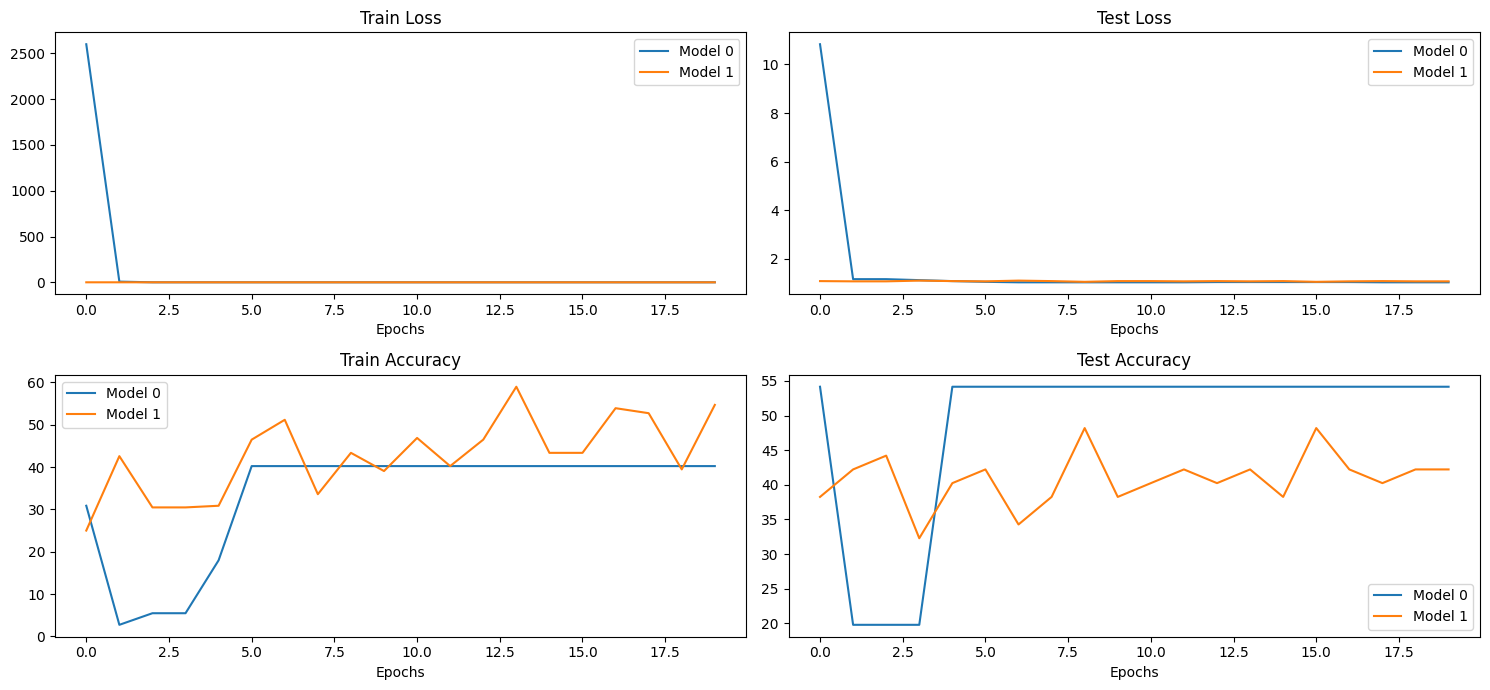

In [114]:
epochs = range(len(model_0_df))

# Plot figure size
plt.figure(figsize = (15,7))

# Plot loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df['train_loss'], label='Model 0')
plt.plot(epochs, model_1_df['train_loss'], label='Model 1')
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df['test_loss'], label='Model 0')
plt.plot(epochs, model_1_df['test_loss'], label='Model 1')
plt.title('Test Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df['train_acc'], label='Model 0')
plt.plot(epochs, model_1_df['train_acc'], label='Model 1')
plt.title('Train Accuracy')
plt.xlabel('Epochs')
plt.legend();

plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df['test_acc'], label='Model 0')
plt.plot(epochs, model_1_df['test_acc'], label='Model 1')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.tight_layout()

**Note:**

* model_1 seem to be overfitting

**Using a custom image for prediction**

In [142]:
from torchvision import transforms

transform = transforms.Compose([transforms.ToPILImage(),
                                transforms.Resize(size = (64, 64)),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.ToTensor()
                               ])


def predict_custom_image(path: str, 
                         transform: transforms,
                         model=nn.Module):

    custom_img = plt.imread(path)

    custom_img_transformed = transform(custom_img)

    model.eval()
    
    with torch.inference_mode():
        custom_pred = model_1(custom_img_transformed.unsqueeze(dim=0).to(device))
    
    pred_class = class_names[torch.softmax(custom_pred, dim=1).argmax(dim=1).item()]
    
    print(f'The custom image is: {pred_class}')

    plt.subplot(1,2,1)
    plt.imshow(custom_img)
    plt.axis(False);
    plt.title(custom_img.shape, fontsize = 10)
    
    plt.subplot(1,2,2)
    custom_img_permuted = custom_img_transformed.permute(1,2,0)
    plt.imshow(custom_img_permuted)
    plt.axis(False);
    plt.title(custom_img_transformed.shape, fontsize = 10);

The custom image is: pizza


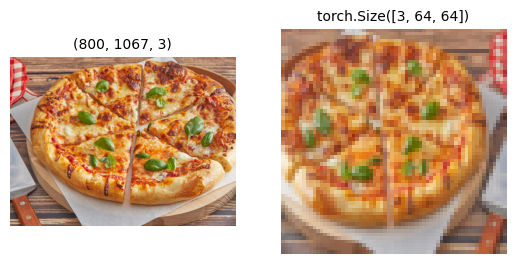

In [143]:
predict_custom_image(path = r"C:\Users\Parker\Downloads\New folder\classic-cheese-pizza-recipe-2-64429a0cb408b.jpg",
                     transform= transform,
                     model= model_1)

The custom image is: steak


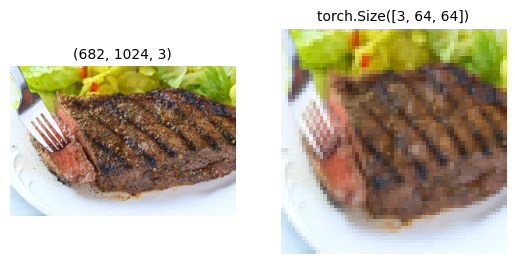

In [146]:
predict_custom_image(path = r"C:\Users\Parker\Downloads\New folder\Grilled-Steak-1-1200-1024x682.jpg",
                     transform= transform,
                     model= model_1)

The custom image is: pizza


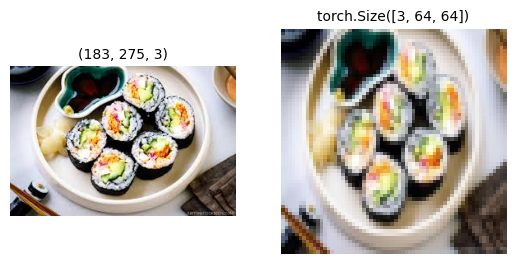

In [149]:
predict_custom_image(path=r"C:\Users\Parker\Downloads\New folder\images.jpeg",
                     transform=transform,
                     model=model_1)

The custom image is: sushi


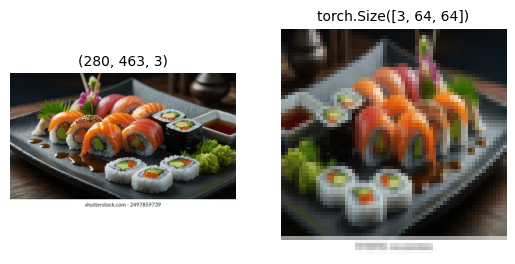

In [154]:
predict_custom_image(path=r"C:\Users\Parker\Downloads\New folder\sushi-platter-vibrant-fresh-restaurant-260nw-2497859739.jpg",
                     transform=transform,
                     model=model_1)

The custom image is: steak


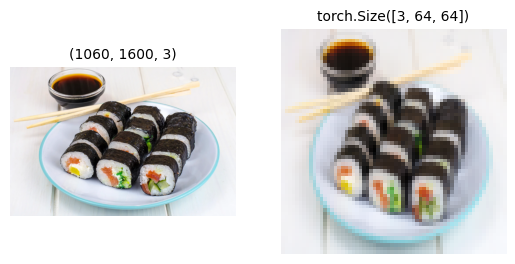

In [155]:
predict_custom_image(path=r"C:\Users\Parker\Downloads\New folder\Maki-zushi.jpg",
                     transform=transform,
                     model=model_1)